In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tcs-file/TCS.NS.csv


In [2]:
data=pd.read_csv("/kaggle/input/tcs-file/TCS.NS.csv")

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-16,2096.000000,2136.000000,2080.300049,2126.750000,2086.768066,5574177.0
1,2019-12-17,2126.500000,2169.000000,2119.000000,2164.949951,2124.250000,6059673.0
2,2019-12-18,2174.000000,2203.449951,2153.000000,2167.750000,2126.997314,8251081.0
3,2019-12-19,2179.800049,2236.500000,2167.550049,2229.050049,2187.145264,6251505.0
4,2019-12-20,2220.000000,2246.699951,2208.250000,2222.899902,2181.110596,5548338.0
...,...,...,...,...,...,...,...
247,2020-12-10,2818.000000,2827.300049,2780.250000,2784.300049,2784.300049,2127801.0
248,2020-12-11,2792.699951,2807.699951,2764.550049,2783.600098,2783.600098,1795408.0
249,2020-12-14,2802.000000,2804.000000,2756.250000,2797.699951,2797.699951,2483658.0
250,2020-12-15,2786.000000,2794.699951,2755.000000,2761.550049,2761.550049,2365509.0


In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-16,2096.000000,2136.000000,2080.300049,2126.750000,2086.768066,5574177.0
1,2019-12-17,2126.500000,2169.000000,2119.000000,2164.949951,2124.250000,6059673.0
2,2019-12-18,2174.000000,2203.449951,2153.000000,2167.750000,2126.997314,8251081.0
3,2019-12-19,2179.800049,2236.500000,2167.550049,2229.050049,2187.145264,6251505.0
4,2019-12-20,2220.000000,2246.699951,2208.250000,2222.899902,2181.110596,5548338.0


In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [6]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2234.510356,2265.382260,2205.041843,2233.662748,2216.480165,4.039248e+06
std,304.529785,298.283311,306.963270,303.157522,310.037930,2.263970e+06
min,1559.699951,1685.449951,1506.050049,1636.349976,1620.991089,1.319430e+06
25%,2045.500000,2064.000000,2019.974976,2043.399964,2027.115601,2.660976e+06
50%,2205.000000,2226.899902,2183.800049,2201.949951,2165.411377,3.400908e+06
75%,2409.475098,2447.000000,2359.050049,2424.300049,2414.007812,4.760710e+06
max,2845.000000,2885.000000,2812.199951,2830.000000,2817.985352,1.983933e+07


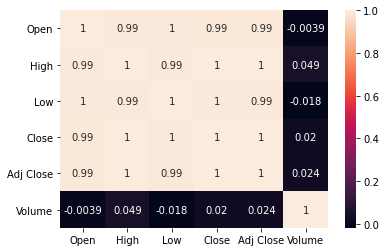

In [10]:
import seaborn as sns

cor = sns.heatmap(data.corr(), annot = True)

In [11]:
#Let's select our features
x = data.loc[:,'Open':'Low']
y = data.loc[:,'Close']

In [12]:
x.head()

,Open,High,Low
0,2096.000000,2136.000000,2080.300049
1,2126.500000,2169.000000,2119.000000
2,2174.000000,2203.449951,2153.000000
3,2179.800049,2236.500000,2167.550049
4,2220.000000,2246.699951,2208.250000


In [13]:
y

0      2126.750000
1      2164.949951
2      2167.750000
3      2229.050049
4      2222.899902
          ...     
247    2784.300049
248    2783.600098
249    2797.699951
250    2761.550049
251    2814.199951
Name: Close, Length: 251, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

In [16]:
# LINEARE

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
LR = LinearRegression()

In [19]:
LR.fit(x_train,y_train)

LinearRegression()

In [20]:
LR.score(x_test,y_test)

0.9958201352745529

In [21]:
x.head(2)

,Open,High,Low
0,2096.0,2136.0,2080.300049
1,2126.5,2169.0,2119.000000


In [22]:
Test_data = [[2786.0,2794.6,2755.0]]
prediction = LR.predict(Test_data)

In [23]:
print(prediction)

[2771.08659441]


In [24]:
data.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
250,2020-12-15,2786.0,2794.699951,2755.000000,2761.550049,2761.550049,2365509.0
251,2020-12-16,2779.0,2819.800049,2760.449951,2814.199951,2814.199951,2563601.0


In [25]:
Test_data = [[2811.0, 2845.00 ,2805.0]]
prediction = LR.predict(Test_data)

In [26]:
print(prediction)

[2831.93994148]
